In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
korea_air = pd.read_csv('Fine_particulate_matter(PM2.5)_P.csv', encoding = 'cp949')

month_korea = korea_air.groupby(by='시도별(1)').agg('mean').T # 시도별(1)을 기준으로 groupby 평균을 구한다.
month_korea.columns.name=''
month_korea

# 지역별로 슬라이싱
gangwon_air = month_korea.loc[:, '강원']
gyeonggi_air= month_korea.loc[:, '경기']
gyeongnam_air= month_korea.loc[:, '경남']
gyeongbuk_air= month_korea.loc[:, '경북']
gwangju_air= month_korea.loc[:, '광주']
daegu_air= month_korea.loc[:, '대구']
daejeon_air= month_korea.loc[:, '대전']
busan_air= month_korea.loc[:, '부산']
seoul_air= month_korea.loc[:, '서울']
sejong_air= month_korea.loc[:, '세종']
ulsan_air= month_korea.loc[:, '울산']
incheon_air= month_korea.loc[:, '인천']
jeonnam_air= month_korea.loc[:, '전남']
jeonbuk_air= month_korea.loc[:, '전북']
jeju_air= month_korea.loc[:, '제주']
chungnam_air= month_korea.loc[:, '충남']
chungbuk_air= month_korea.loc[:, '충북']

# 지역별 이름을 리스트로 정리
korea_data = [gangwon_air, gyeonggi_air, gyeongnam_air, gyeongbuk_air, gwangju_air, daegu_air, daejeon_air, busan_air, seoul_air, sejong_air, ulsan_air, incheon_air, jeonnam_air, jeonbuk_air, jeju_air, chungnam_air, chungbuk_air]

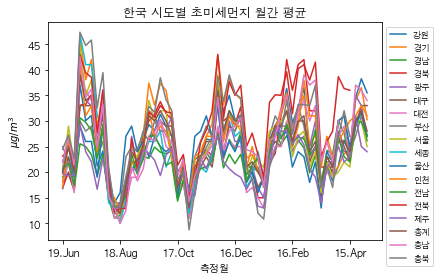

In [3]:
plt.rc('font', family='AppleGothic')
month_korea.plot()
plt.xticks(rotation=0)
plt.xlabel('측정월')
plt.ylabel('$\mu g/m^3$')
plt.title('한국 시도별 초미세먼지 월간 평균')
plt.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show();

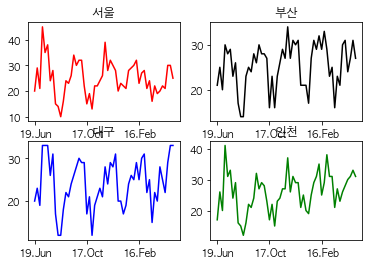

In [37]:
plt.subplot(2, 2, 1)
plt.title('서울')
seoul_air.plot(color = 'r')

plt.subplot(2, 2, 2)
plt.title('부산')
busan_air.plot(color = 'k')

plt.subplot(2, 2, 3)
plt.title('대구')
daegu_air.plot(color = 'b')

plt.subplot(2, 2, 4)
plt.title('인천')
incheon_air.plot(color = 'g')

## 1. 미세먼지(PM10)와 초미세먼지(PM2.5)
##### 최근 들어서 미세먼지와 관련된 뉴스나 기사를 흔하게 접할 수 있다. 이제는 외출의 가능성을 미세먼지를 기준을 두고 이야 기하기도 한다. 사실 과거에는 미세먼지나 초미세먼지라는 단어보다는 황사라는 단어를 많이 써왔고 미세먼지를 인식하게 되기까지는 얼마 되지 않는다. 그리고 이제는 미세먼지보다 직격이 훨씬 작아 어지간한 필터로는 걸러지지 않고 우리의 건 강을 해치는 초미세먼지에 더 많은 관심을 가지고 있으며 사회적으로도 큰 문제가 되고 있다.
##### 그렇다면 초미세먼지가 얼마나 심각한지 서울과 캘리포니아(California)의 초미세먼지 일일 평균을 비교해서 알아보자.

### 서울시의 초미세먼지 일일 평균을 구한다.

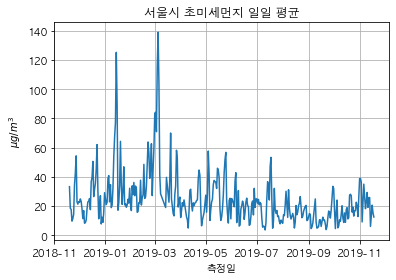

In [5]:
seoul_daily_air = pd.read_csv('seoul_daily.csv', parse_dates=['측정일시'])
# 서울지역을 측정일별로 그룹화해서 평균을 구한다.
daily_seoul = seoul_daily_air.groupby(by='측정일시').agg('mean')
daily_seoul_pm25 = daily_seoul.loc[:, '초미세먼지(㎍/㎥)']

plt.rc('font', family='AppleGothic')
plt.grid(True)
plt.plot(daily_seoul_pm25)
plt.xlabel('측정일')
plt.ylabel('$\mu g/m^3$')
plt.title('서울시 초미세먼지 일일 평균')
plt.show();

In [38]:
daily_seoul_pm25.gt(75).sum()

8

##### 다음은 seoul_daily_air.csv 파일을 읽어들여서 측정 일시를 기준으로 통계치(평균)을 구하고 분석에 필요한 초미세먼지 칼 럼만 추출해서 그래프로 표현한 모습이다.
##### 비정상적으로 높은 2019년 1월과 3월의 초미세먼지 농도를 보면 이미 WHO 가이드라인인 일 평균 25μg/m 을 뛰어넘었 고, KR AQI의 나쁨 가이드라인 75μg/m 은 다음을 통해 8개가 관측된 것을 알 수 있다.

## 2. 이제 CALIFORNIA의 YOSEMITE 미세먼지 일일 평균을 구해보자.

#### CA(Califonia)와 서울의 초미세먼지 일일평균

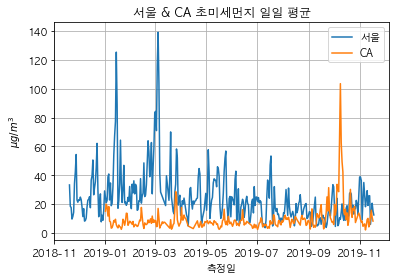

In [7]:
CA_2019 = pd.read_csv('Yosemite_air_daily_2019.csv', parse_dates=['Date'], index_col='Date')
daily_CA = CA_2019.loc[CA_2019['Site Name'] == 'Yosemite NP-Yosemite Village Vistor Center', 'Daily Mean PM2.5 Concentration']

plt.rc('font', family='AppleGothic')
plt.grid(True)
plt.plot(daily_seoul_pm25)
plt.plot(daily_CA)
plt.xlabel('측정일')
plt.ylabel('$\mu g/m^3$')
plt.title('서울 & CA 초미세먼지 일일 평균')
plt.legend(['서울', 'CA'])
plt.show();

##### Yosemite_air_daily_2019.csv 파일을 읽어서 데이터 분석에 필요한 ‘Yosemite NP-Yosemite Village Vistor Center’와 'Daily Mean PM2.5 Concentration’만 슬라이스해서 일일 California를 만들어서 서울과 California 초미세먼지 일일 평 균을 그래프로 그려보았다.
##### 파란색이 서울 주황색이 California인데 한눈에 봐도 California의 2019년 10월의 초미세먼지가 눈에 띄게 높은 것을 볼 수 있다.
##### 실제로 이날 California에는 대규모 산불이 일어났고 다음 기사를 통해 확인해볼 수 있다.
##### 분석을 통해 알 수 있는 사실은 대규모의 산불이 일어난 California보다도 서울의 미세먼지가 압도적으로 높은 것을 볼 수 있다. 산불이 발생하면 우리 건강에 해롭다는 것은 누 구나 알고 있는 사실이다. 하지만 슬프게도 서울의 초미세먼 지 농도는 대형 산불이 일어나 일시적으로 높아진 California보다 평균적으로 더 높다는 것을 알 수 있고 이는 매우 심각한 문제라는 것 또한 알 수 있다.
[출처] : http://news.jtbc.joins.com/article/article.aspx?news_id=NB11901086
 

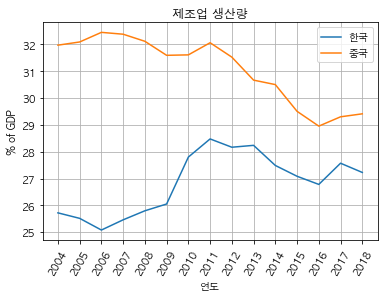

In [8]:
world_manufacturing_per = pd.read_csv('world_manufacturing.csv', skiprows = 4, index_col = 'Country Name').iloc[:, 3:]
china_manufactur_per = world_manufacturing_per.loc['China', '2004' : '2018']
korea_manufactur_per = world_manufacturing_per.loc['Korea, Rep.', '2004' : '2018']

plt.plot(korea_manufactur_per)
plt.plot(china_manufactur_per)
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel('연도')
plt.ylabel('% of GDP')
plt.title('제조업 생산량')
plt.legend(['한국', '중국'])

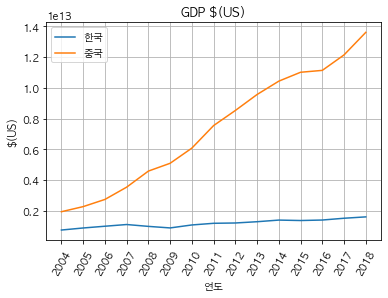

In [9]:
world_GDP_US = pd.read_csv('GDP_Current_US.csv', skiprows = 4, index_col = 'Country Name').iloc[:, 3:]
china_GDP_US = world_GDP_US.loc['China', '2004' : '2018']
korea_GDP_US = world_GDP_US.loc['Korea, Rep.', '2004' : '2018']

plt.plot(korea_GDP_US)
plt.plot(china_GDP_US)
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel('연도')
plt.ylabel('$(US)')
plt.title('GDP $(US)')
plt.legend(['한국', '중국'])

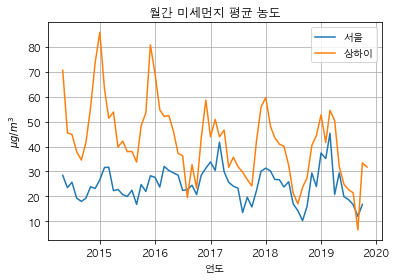

In [10]:
Shanghai = pd.read_csv('Shanghai.txt', encoding = 'cp949', sep = '\t', skiprows = 7)
Shanghai_result = Shanghai['PM2.5'].groupby([Shanghai[' Year'], Shanghai['Month']]).mean()
date_list = []
for item in Shanghai_result.index:
    if(item[1] < 10):
        df = "{0}0{1}".format(item[0], item[1])
    else:
        df = "{0}{1}".format(item[0], item[1])
    date_list.append(int(df))

Shanghai_monthly_pm25 = pd.Series(Shanghai_result.values, index = date_list)
Shanghai_monthly_pm25.index = pd.to_datetime(Shanghai_monthly_pm25.index, format='%Y%m')

Seoul_monthly = pd.read_csv('Seoul_Monthly_pm25.csv', parse_dates=['Date'], index_col='Date')
Seoul_monthly = Seoul_monthly.groupby(by='Date').agg('mean')
Seoul_monthly_pm25 = Seoul_monthly.loc['201405':'201910', 'PM2.5(㎍/㎥)']
Seoul_monthly_pm25.index = pd.to_datetime(Seoul_monthly_pm25.index, format='%Y%m')

plt.plot(Seoul_monthly_pm25)
plt.plot(Shanghai_monthly_pm25)
plt.grid(True)
plt.xlabel('연도')
plt.ylabel('$\mu g/m^3$')
plt.title('월간 미세먼지 평균 농도')
plt.legend(['서울', '상하이'])


In [11]:
allFiles = ['Seoul_temp_data/Seoul2014_temp.csv', 'Seoul_temp_data/Seoul2015_temp.csv', 
            'Seoul_temp_data/Seoul2016_temp.csv', 'Seoul_temp_data/Seoul2017_temp.csv', 
            'Seoul_temp_data/Seoul2018_temp.csv', 'Seoul_temp_data/Seoul2019_temp.csv']

list_date = []
list_temp = []
list_precipitation = []
list_wind_speed = []
list_wind_direction = []
result = pd.DataFrame(columns=["지점", "일시", "기온(°C)", "강수량(mm)", "풍속(m/s)", "풍향(16방위)"])

for file in allFiles:
    df = pd.read_csv(file, encoding='cp949', skiprows=0, na_values=-999)
    list_date.append(list(df['일시']))
    list_temp.append(list(df['기온(°C)']))
    list_precipitation.append(list(df['강수량(mm)']))
    list_wind_speed.append(list(df['풍속(m/s)']))
    list_wind_direction.append(list(df['풍향(16방위)']))

df_0 = pd.DataFrame({'기온' : list_temp[0], '강수량' : list_precipitation[0], '풍속' : list_wind_speed[0], '풍향' : list_wind_direction[0]}, index = list_date[0])
df_1 = pd.DataFrame({'기온' : list_temp[1], '강수량' : list_precipitation[1], '풍속' : list_wind_speed[1], '풍향' : list_wind_direction[1]}, index = list_date[1])
df_2 = pd.DataFrame({'기온' : list_temp[2], '강수량' : list_precipitation[2], '풍속' : list_wind_speed[2], '풍향' : list_wind_direction[2]}, index = list_date[2])
df_3 = pd.DataFrame({'기온' : list_temp[3], '강수량' : list_precipitation[3], '풍속' : list_wind_speed[3], '풍향' : list_wind_direction[3]}, index = list_date[3])
df_4 = pd.DataFrame({'기온' : list_temp[4], '강수량' : list_precipitation[4], '풍속' : list_wind_speed[4], '풍향' : list_wind_direction[4]}, index = list_date[4])
df_5 = pd.DataFrame({'기온' : list_temp[5], '강수량' : list_precipitation[5], '풍속' : list_wind_speed[5], '풍향' : list_wind_direction[5]}, index = list_date[5])

Seoul_hourly_temp = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5])
Seoul_hourly_temp.index = pd.to_datetime(Seoul_hourly_temp.index, format='%Y-%m')

# 풍향을 구하기 위해서 degree를 radian값으로 변경해준다.
Seoul_hourly_temp['풍향'] = math.pi*Seoul_hourly_temp['풍향']/180

Seoul_monthly_temp = Seoul_hourly_temp.groupby(by=Seoul_hourly_temp.index).agg('mean')
Seoul_monthly_temp['Date'] = pd.to_datetime(Seoul_monthly_temp.index)
Seoul_monthly_temp['Year-Month'] = Seoul_monthly_temp['Date'].dt.to_period(freq='M')
Seoul_monthly_temp['Month'] = Seoul_monthly_temp['Date'].dt.month
Seoul_monthly_temp['Year'] = Seoul_monthly_temp['Date'].dt.year
#Seoul_monthly_temp.set_index('연도', inplace=True)

Seoul_monthly_temp = Seoul_monthly_temp.groupby(Seoul_monthly_temp['Year-Month']).agg('mean')

In [13]:
#2014
Seoul_2014_temp = Seoul_monthly_temp.iloc[0:12]
Seoul_2014_temp.set_index('Month', inplace=True)
del Seoul_2014_temp['Year']

#2015
Seoul_2015_temp = Seoul_monthly_temp.iloc[12:24]
Seoul_2015_temp.set_index('Month', inplace=True)
del Seoul_2015_temp['Year']

#2016
Seoul_2016_temp = Seoul_monthly_temp.iloc[24:36]
Seoul_2016_temp.set_index('Month', inplace=True)
del Seoul_2016_temp['Year']

#2017
Seoul_2017_temp = Seoul_monthly_temp.iloc[36:48]
Seoul_2017_temp.set_index('Month', inplace=True)
del Seoul_2017_temp['Year']

#2018
Seoul_2018_temp = Seoul_monthly_temp.iloc[48:60]
Seoul_2018_temp.set_index('Month', inplace=True)
del Seoul_2018_temp['Year']

#2019
Seoul_2019_temp = Seoul_monthly_temp.iloc[60:-1]
Seoul_2019_temp.set_index('Month', inplace=True)
del Seoul_2019_temp['Year']

In [14]:
Seoul_monthly_temp

,기온,강수량,풍속,풍향,Month,Year
Year-Month,,,,,,
2014-01,-0.639598,0.329938,2.441147,3.592061,1,2014
2014-02,1.930506,0.634524,2.690030,3.052360,2,2014
2014-03,7.845565,0.204167,3.010618,3.713986,3,2014
2014-04,13.942083,0.227441,2.849028,3.361838,4,2014
2014-05,18.921237,1.010185,3.192339,3.734019,5,2014
...,...,...,...,...,...,...
2019-07,25.859677,0.629743,1.829435,3.092564,7,2019
2019-08,27.188038,1.833001,1.596371,3.063475,8,2019
2019-09,22.635139,0.737584,2.166490,4.715959,9,2019


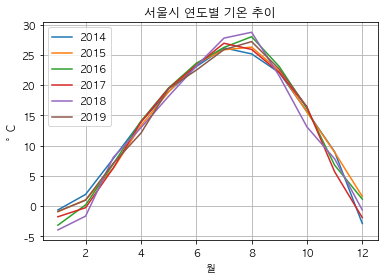

In [15]:
#plt.subplot(121)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.grid(True)
plt.plot(Seoul_2014_temp['기온'])
plt.plot(Seoul_2015_temp['기온'])
plt.plot(Seoul_2016_temp['기온'])
plt.plot(Seoul_2017_temp['기온'])
plt.plot(Seoul_2018_temp['기온'])
plt.plot(Seoul_2019_temp['기온'])
plt.xlabel('월')
plt.ylabel('°C')
plt.title('서울시 연도별 기온 추이')
plt.legend(['2014', '2015', '2016', '2017', '2018', '2019'])

#plt.subplot(122)


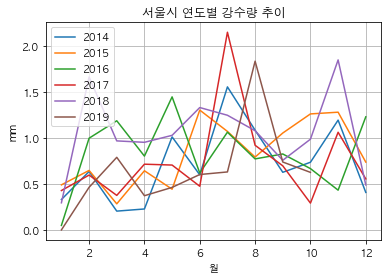

In [16]:
plt.rc('font', family='AppleGothic')
plt.grid(True)
plt.plot(Seoul_2014_temp['강수량'])
plt.plot(Seoul_2015_temp['강수량'])
plt.plot(Seoul_2016_temp['강수량'])
plt.plot(Seoul_2017_temp['강수량'])
plt.plot(Seoul_2018_temp['강수량'])
plt.plot(Seoul_2019_temp['강수량'])
plt.xlabel('월')
plt.ylabel('mm')
plt.title('서울시 연도별 강수량 추이')
plt.legend(['2014', '2015', '2016', '2017', '2018', '2019'])

Text(0.5, 1.0, '서울시 연도별 기온 추이')

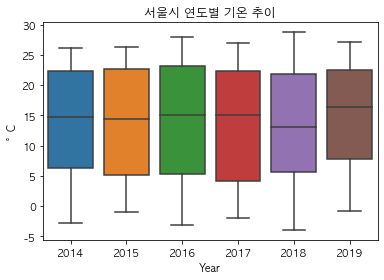

In [17]:
sns.boxplot(Seoul_monthly_temp['Year'], Seoul_monthly_temp['기온'])
plt.xlabel('Year')
plt.ylabel('°C')
plt.title('서울시 연도별 기온 추이')

Text(0.5, 1.0, '서울시 연도별 강수량 추이')

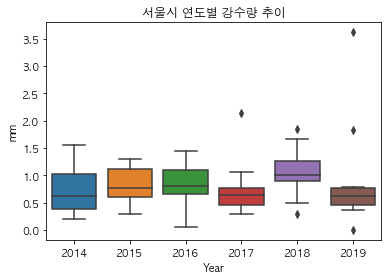

In [18]:
sns.boxplot(Seoul_monthly_temp['Year'], Seoul_monthly_temp['강수량'])
plt.xlabel('Year')
plt.ylabel('mm')
plt.title('서울시 연도별 강수량 추이')

In [19]:
wind = []
for w in Seoul_monthly_temp['풍향']:
    if((w >= math.radians(0) and w <= math.radians(22.5)) or (w >= math.radians(337.5) and w <= math.radians(360))):
        wind.append('N')
    if(w >= math.radians(22.5) and w < math.radians(67.5)):
        wind.append('NE')
    if(w >= math.radians(67.5) and w < math.radians(112.5)):
        wind.append('E')
    if(w >= math.radians(112.5) and w < math.radians(157.5)):
        wind.append('SE')
    if(w >= math.radians(157.7) and w < math.radians(202.5)):
        wind.append('S')
    if(w >= math.radians(202.5) and w < math.radians(247.5)):
        wind.append('SW')
    if(w >= math.radians(247.5) and w < math.radians(292.5)):
        wind.append('W')
    if(w >= math.radians(292.5) and w < math.radians(337.5)):
        wind.append('NW')
Seoul_monthly_temp['Wind'] = wind

a = Seoul_monthly_temp['풍향'][0]
math.degrees(a)

205.8099579242637

In [26]:
Seoul_monthly_temp[48:60]

,기온,강수량,풍속,풍향,Month,Year,Wind
Year-Month,,,,,,,
2018-01,-3.940457,0.294667,1.873919,4.349095,1,2018,W
2018-02,-1.664732,1.661111,2.182887,4.282290,2,2018,SW
2018-03,8.044489,0.967063,1.921774,3.428962,3,2018,S
2018-04,12.948056,0.951527,1.985972,3.563138,4,2018,SW
2018-05,18.144355,1.027385,1.719624,3.411368,5,2018,S
2018-06,23.136806,1.329337,1.675833,3.574046,6,2018,SW
2018-07,27.763978,1.245529,1.454167,3.096552,7,2018,S
2018-08,28.736425,1.077568,1.700403,3.034152,8,2018,S
2018-09,21.498750,0.756245,1.554028,2.583087,9,2018,SE


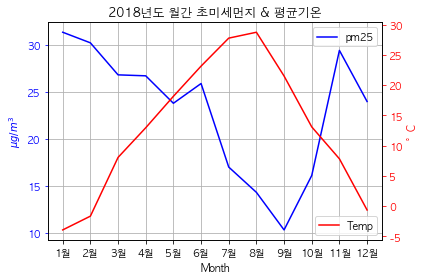

In [35]:
pm25 = list(Seoul_monthly_pm25[44:56])
temp = list(Seoul_monthly_temp[48:60]['기온'])

fig, ax1 = plt.subplots()
t = ["{}월".format(i + 1) for i in range(12)]
plt.title('2018년도 월간 초미세먼지 & 평균기온')

ax1.plot(t, pm25, 'b')
ax1.set_xlabel('Month')
ax1.set_ylabel('$\mu g/m^3$', color = 'b')
ax1.tick_params('y', colors='b')
plt.legend(['pm25'])
plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(t, temp, 'r')
ax2.set_ylabel('°C', color = 'r')
ax2.tick_params('y', colors='r')
plt.legend(['Temp'], loc=4)


plt.show()

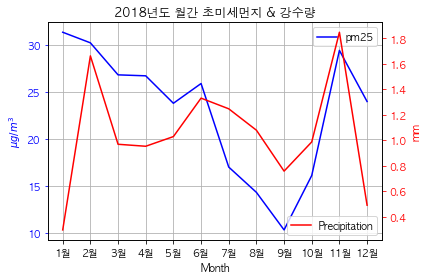

In [36]:
pm25 = list(Seoul_monthly_pm25[44:56])
temp = list(Seoul_monthly_temp[48:60]['강수량'])

fig, ax1 = plt.subplots()
t = ["{}월".format(i + 1) for i in range(12)]
plt.title('2018년도 월간 초미세먼지 & 강수량')

ax1.plot(t, pm25, 'b')
ax1.set_xlabel('Month')
ax1.set_ylabel('$\mu g/m^3$', color = 'b')
ax1.tick_params('y', colors='b')
plt.legend(['pm25'])
plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(t, temp, 'r')
ax2.set_ylabel('mm', color = 'r')
ax2.tick_params('y', colors='r')
plt.legend(['Precipitation'], loc=4)


plt.show()